In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import gmaps
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels

In [3]:
#import csv file
data=pd.read_csv("Food_Inspections.csv")

In [4]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2177022,CORNERSTONE CHILD CARE,CORNERSTONE CHILD CARE,2215716.0,Daycare Above and Under 2 Years,Risk 1 (High),1111 N WELLS ST,CHICAGO,IL,60610.0,6/8/2018,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.902439,-87.634278,"(41.90243867998565, -87.63427774207456)"
1,1561742,LE CAFE,LE CAFE,2178017.0,Restaurant,Risk 1 (High),4655 N LINCOLN AVE,CHICAGO,IL,60625.0,7/31/2015,Recent Inspection,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.966413,-87.686937,"(41.96641308847062, -87.68693718914149)"
2,2288609,"LITTLE PEOPLE LEARNING, INC","LITTLE PEOPLE LEARNING, INC",2570234.0,Children's Services Facility,Risk 1 (High),5650 S WOODLAWN AVE,CHICAGO,IL,60637.0,5/10/2019,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.791762,-87.596612,"(41.791761831643065, -87.59661166762221)"
3,335329,J & J FISH,J & J FISH,69148.0,Restaurant,Risk 2 (Medium),1945 E 79TH ST,CHICAGO,IL,60649.0,10/7/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.751489,-87.576634,"(41.75148901882857, -87.57663364715819)"
4,1389412,ROYAL CHICKEN,NaN,2289533.0,Restaurant,Risk 2 (Medium),5254 W CHICAGO AVE,CHICAGO,IL,60651.0,4/9/2014,License Re-Inspection,Pass,NaN,41.895023,-87.757835,"(41.89502331496054, -87.75783480830066)"


In [5]:
#number or rows and columns in the dataset
print(data.shape)

(208254, 17)


In [6]:
#check if there are any null values
data.isnull().values.any()

True

In [7]:
#view all the columns that have null values
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
License #             17
Facility Type       4861
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
Latitude             688
Longitude            688
Location             688
dtype: int64

In [8]:
#look at specific column that have nulls
print(data[data["License #"].isnull()][null_columns])

                               AKA Name  License #  \
4483               ST. DEMETRIOS CHURCH        NaN   
4641               ST. DEMETRIOS CHURCH        NaN   
34562   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
45604              ST. DEMETRIOS CHURCH        NaN   
60700          OLD ST. PATRICK'S CHURCH        NaN   
94116          OLD ST. PATRICK'S CHURCH        NaN   
96001              ST. DEMETRIOS CHURCH        NaN   
96068                               NaN        NaN   
99050   GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
114901                              NaN        NaN   
122683             ST. DEMETRIOS CHURCH        NaN   
124533             ST. DEMETRIOS CHURCH        NaN   
132290             ST. DEMETRIOS CHURCH        NaN   
184529             ST. DEMETRIOS CHURCH        NaN   
194554             ST. DEMETRIOS CHURCH        NaN   
196808  GOD'S BATTLE AXE PRAYER ACADEMY        NaN   
196948                  ARGENTINA FOODS        NaN   

                      Facil

In [9]:
# filter the dataset by facility type =restaurant and look at its shape
restaurant_data = data[data['Facility Type']=="Restaurant"]
print(restaurant_data.shape)

(138590, 17)


In [10]:
restaurant_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,1561742,LE CAFE,LE CAFE,2178017.0,Restaurant,Risk 1 (High),4655 N LINCOLN AVE,CHICAGO,IL,60625.0,7/31/2015,Recent Inspection,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.966413,-87.686937,"(41.96641308847062, -87.68693718914149)"
3,335329,J & J FISH,J & J FISH,69148.0,Restaurant,Risk 2 (Medium),1945 E 79TH ST,CHICAGO,IL,60649.0,10/7/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.751489,-87.576634,"(41.75148901882857, -87.57663364715819)"
4,1389412,ROYAL CHICKEN,NaN,2289533.0,Restaurant,Risk 2 (Medium),5254 W CHICAGO AVE,CHICAGO,IL,60651.0,4/9/2014,License Re-Inspection,Pass,NaN,41.895023,-87.757835,"(41.89502331496054, -87.75783480830066)"
6,1096394,JIMMY GREEN'S,JIMMY GREEN'S,1979963.0,Restaurant,Risk 1 (High),825 S STATE ST,CHICAGO,IL,60605.0,7/24/2012,Canvass,Out of Business,NaN,41.871464,-87.627369,"(41.87146433662049, -87.62736908629603)"
7,2135370,CONRAD CHICAGO,BAPTISTE & BOTTLE,2457427.0,Restaurant,Risk 1 (High),101 E ERIE ST,CHICAGO,IL,60611.0,1/12/2018,Canvass,Pass w/ Conditions,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.894010,-87.625368,"(41.89400968711272, -87.62536771830537)"


In [11]:
# we want to keep just the restaurants where we know the location, so we drop the rows where location is NaN:
restaurants_df = restaurant_data[restaurant_data['Location'].notna()]
restaurants_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,1561742,LE CAFE,LE CAFE,2178017.0,Restaurant,Risk 1 (High),4655 N LINCOLN AVE,CHICAGO,IL,60625.0,7/31/2015,Recent Inspection,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.966413,-87.686937,"(41.96641308847062, -87.68693718914149)"
3,335329,J & J FISH,J & J FISH,69148.0,Restaurant,Risk 2 (Medium),1945 E 79TH ST,CHICAGO,IL,60649.0,10/7/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.751489,-87.576634,"(41.75148901882857, -87.57663364715819)"
4,1389412,ROYAL CHICKEN,NaN,2289533.0,Restaurant,Risk 2 (Medium),5254 W CHICAGO AVE,CHICAGO,IL,60651.0,4/9/2014,License Re-Inspection,Pass,NaN,41.895023,-87.757835,"(41.89502331496054, -87.75783480830066)"
6,1096394,JIMMY GREEN'S,JIMMY GREEN'S,1979963.0,Restaurant,Risk 1 (High),825 S STATE ST,CHICAGO,IL,60605.0,7/24/2012,Canvass,Out of Business,NaN,41.871464,-87.627369,"(41.87146433662049, -87.62736908629603)"
7,2135370,CONRAD CHICAGO,BAPTISTE & BOTTLE,2457427.0,Restaurant,Risk 1 (High),101 E ERIE ST,CHICAGO,IL,60611.0,1/12/2018,Canvass,Pass w/ Conditions,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.894010,-87.625368,"(41.89400968711272, -87.62536771830537)"


In [12]:
#number of unique zip codes in the dataset:
len(restaurants_df['Zip'].unique().tolist())

60

In [13]:
#make sure there are no more null values in the "location" column
null_columns=restaurants_df.columns[restaurants_df.isnull().any()]
data[null_columns].isnull().sum()

AKA Name            2479
Risk                  73
City                 150
State                 48
Zip                   50
Inspection Type        1
Violations         55325
dtype: int64

In [14]:
#how many unique restaurants we have in the data based on location:
len(restaurants_df['Location'].unique().tolist())

9523

In [15]:
# eliminate restaurants that are "out of business" or "business not located":
clean_data=restaurants_df[(restaurants_df['Results'] != 'Out of Business') & (restaurants_df['Results'] != 'Business Not Located')]

In [16]:
#find out how many unique restaurant locations we have in our dataset after the drop:
len(clean_data['Location'].unique().tolist())

9380

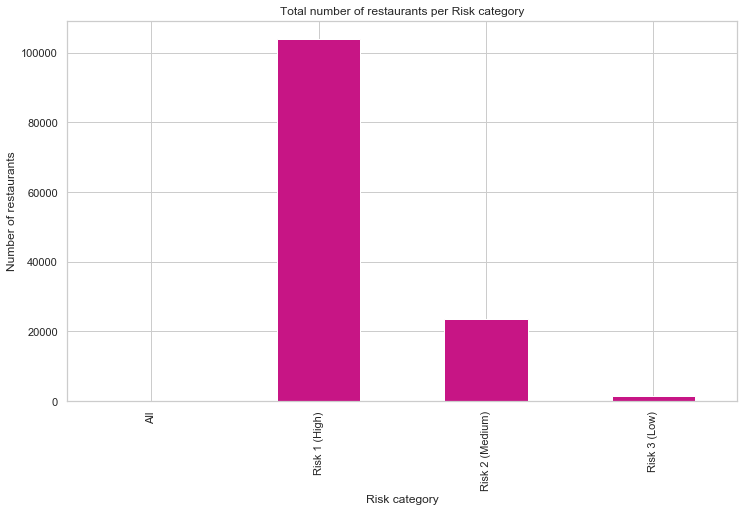

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing the total number of restaurants for each Risk category 

#First, we use groupby "risk category" and count location to determine the data points
risk_data_points = clean_data.groupby(["Risk"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="mediumvioletred", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Total number of restaurants per Risk category")
plt.xlabel("Risk category")
plt.ylabel("Number of restaurants")

#show chart and set layout
plt.show()
plt.tight_layout()

In [18]:
#We can see that most restaurants are at high risk. We can also confirm this from the data:
clean_data['Risk'].value_counts()

Risk 1 (High)      103971
Risk 2 (Medium)     23467
Risk 3 (Low)         1350
All                     8
Name: Risk, dtype: int64

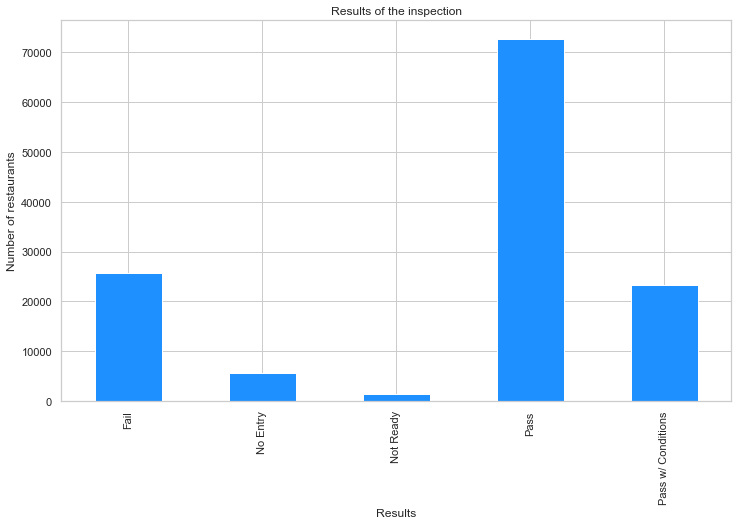

<Figure size 432x288 with 0 Axes>

In [19]:
#Next, we look at the results of the inspections

#First, we use groupby "Results" and count location to determine the data points
risk_data_points = clean_data.groupby(["Results"]).count()["Location"]
risk_data_points

#Second, we plot the points
risk_data_points.plot(kind="bar", color="dodgerblue", figsize=(12,7))

#Last, we set chart title and axis labels
plt.title("Results of the inspection")
plt.xlabel("Results")
plt.ylabel("Number of restaurants")

#show chart and set layout
plt.show()
plt.tight_layout()

In [20]:
#confirm from the data:
clean_data['Results'].value_counts()

Pass                  72792
Fail                  25735
Pass w/ Conditions    23220
No Entry               5678
Not Ready              1374
Name: Results, dtype: int64

In [21]:
clean_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,1561742,LE CAFE,LE CAFE,2178017.0,Restaurant,Risk 1 (High),4655 N LINCOLN AVE,CHICAGO,IL,60625.0,7/31/2015,Recent Inspection,Pass w/ Conditions,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.966413,-87.686937,"(41.96641308847062, -87.68693718914149)"
3,335329,J & J FISH,J & J FISH,69148.0,Restaurant,Risk 2 (Medium),1945 E 79TH ST,CHICAGO,IL,60649.0,10/7/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.751489,-87.576634,"(41.75148901882857, -87.57663364715819)"
4,1389412,ROYAL CHICKEN,NaN,2289533.0,Restaurant,Risk 2 (Medium),5254 W CHICAGO AVE,CHICAGO,IL,60651.0,4/9/2014,License Re-Inspection,Pass,NaN,41.895023,-87.757835,"(41.89502331496054, -87.75783480830066)"
7,2135370,CONRAD CHICAGO,BAPTISTE & BOTTLE,2457427.0,Restaurant,Risk 1 (High),101 E ERIE ST,CHICAGO,IL,60611.0,1/12/2018,Canvass,Pass w/ Conditions,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.894010,-87.625368,"(41.89400968711272, -87.62536771830537)"
10,1329328,MATHER'S MORE THEN A CAFE,MATHER'S MORE THAN A CAFE,1800580.0,Restaurant,Risk 1 (High),3235 N CENTRAL AVE,CHICAGO,IL,60634.0,6/6/2013,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.939654,-87.766391,"(41.9396542640577, -87.76639051535662)"


In [22]:
#Drop the rows where Risk= All or where we have nan and only keep high, medium or low risk
final_dataset=clean_data[clean_data.Risk!='All']
final_dataset['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', nan],
      dtype=object)

In [23]:
final_risk=final_dataset[final_dataset.Risk.notnull()]
final_risk['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)'], dtype=object)

In [24]:
X = pd.get_dummies(data.Risk)

In [25]:
X = X.drop(columns=['All'])

In [26]:
Y = final_dataset['Results']

In [27]:
Y

1         Pass w/ Conditions
3                       Pass
4                       Pass
7         Pass w/ Conditions
10                      Pass
                 ...        
208247                  Fail
208249              No Entry
208250    Pass w/ Conditions
208251                  Pass
208252                  Pass
Name: Results, Length: 128791, dtype: object

In [28]:
#Logistic Regression

In [29]:
# Next, we want to see if there is a correlation between Risk Category and Inspection Results.
# How good is risk category at predicting if a restaurant is going to pass/fail the inspections?

In [30]:
print(list(final_risk.columns))

['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude', 'Location']


In [31]:
#We know that logistic regression requires our response variable to be binary. For this analysis, we will consider "Pass" and Pass w/Conditions" as Pass(1)
#and "Fail", "Not Ready" and "No Entry" as Fail(0)

results_numerical = {"Results" :{"Pass": 1, "Pass w/ Conditions": 1, "Fail":0, "Not Ready":0, "No Entry":0}}
print(results_numerical)

{'Results': {'Pass': 1, 'Pass w/ Conditions': 1, 'Fail': 0, 'Not Ready': 0, 'No Entry': 0}}


In [32]:
final_df=final_risk.replace(results_numerical)
final_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,1561742,LE CAFE,LE CAFE,2178017.0,Restaurant,Risk 1 (High),4655 N LINCOLN AVE,CHICAGO,IL,60625.0,7/31/2015,Recent Inspection,1,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.966413,-87.686937,"(41.96641308847062, -87.68693718914149)"
3,335329,J & J FISH,J & J FISH,69148.0,Restaurant,Risk 2 (Medium),1945 E 79TH ST,CHICAGO,IL,60649.0,10/7/2010,Canvass,1,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.751489,-87.576634,"(41.75148901882857, -87.57663364715819)"
4,1389412,ROYAL CHICKEN,NaN,2289533.0,Restaurant,Risk 2 (Medium),5254 W CHICAGO AVE,CHICAGO,IL,60651.0,4/9/2014,License Re-Inspection,1,NaN,41.895023,-87.757835,"(41.89502331496054, -87.75783480830066)"
7,2135370,CONRAD CHICAGO,BAPTISTE & BOTTLE,2457427.0,Restaurant,Risk 1 (High),101 E ERIE ST,CHICAGO,IL,60611.0,1/12/2018,Canvass,1,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.894010,-87.625368,"(41.89400968711272, -87.62536771830537)"
10,1329328,MATHER'S MORE THEN A CAFE,MATHER'S MORE THAN A CAFE,1800580.0,Restaurant,Risk 1 (High),3235 N CENTRAL AVE,CHICAGO,IL,60634.0,6/6/2013,Canvass,1,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.939654,-87.766391,"(41.9396542640577, -87.76639051535662)"


In [33]:
#univariate logistic regression
#define our X and Y
Y=list(final_df['Results'])


In [34]:
#dummy variabke for X
X = pd.get_dummies(final_df['Risk'])

In [35]:
data=final_data[['Risk','Results']]
data

NameError: name 'final_data' is not defined

In [36]:
y=data.Results

In [37]:
y.value_counts()

Pass                    109675
Fail                     40267
Pass w/ Conditions       31134
Out of Business          18110
No Entry                  6887
Not Ready                 2109
Business Not Located        72
Name: Results, dtype: int64

In [38]:
#create samples
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
Risk_train, Risk_test, Results_train, Results_test= train_test_split(X,Y, test_size=0.3, random_state=0)

ModuleNotFoundError: No module named 'imblearn'

In [39]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.566879
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.001      
Dependent Variable: y                AIC:              146020.3134
Date:               2020-07-27 15:22 BIC:              146049.6112
No. Observations:   128788           Log-Likelihood:   -73007.    
Df Model:           2                LL-Null:          -73051.    
Df Residuals:       128785           LLR p-value:      7.4432e-20 
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
-------------------------------------------------------------------
                 Coef.   Std.Err.     z      P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Risk 1 (High)    1.0555    0.0071  148.9388  0.0000  1.0416  1.0694
Risk 2 (Medium)  1.1838    0.0154   76.8183  0.00

In [40]:
#Test the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
Risk_train, Risk_test, Results_train, Results_test = train_test_split(data['Risk'], data['Results'], test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(pd.DataFrame(Risk_train),Results_train)
Results_pred = logreg.predict(pd.DataFrame(Risk_test))
Results_pred

ValueError: could not convert string to float: 'Risk 1 (High)'

In [ ]:
# Check the accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(pd.DataFrame(Risk_test),pd.DataFrame (Results_test))))

In [ ]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(pd.DataFrame(Results_test), pd.DataFrame(Results_pred))
print(confusion_matrix)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pd.DataFrame(Results_test), pd.DataFrame(Results_pred)))

In [50]:
#Kynan isolate complaint inspections and canvas inspections
complaint_data = clean_data[clean_data["Inspection Type"]== "Complaint"]
canvass_data = clean_data[clean_data["Inspection Type"]== "Canvass"]

In [51]:
#Kynan look at inspection pass fail rates by inspection type
complaint_consequence = complaint_data["Results"]
canvass_consequence = canvass_data["Results"]
complaint_consequence.value_counts()
com_consequences = ["Pass", "Fail", "Pass w/Conditions", "No Entry", " "]
canvass_consequence.value_counts()
can_consequences = ["Pass", "Pass w/Conditions",  "Fail","No Entry", " "]
complaint_consequence.value_counts()

Pass                  6190
Fail                  4580
Pass w/ Conditions    3273
No Entry               660
Not Ready               12
Name: Results, dtype: int64

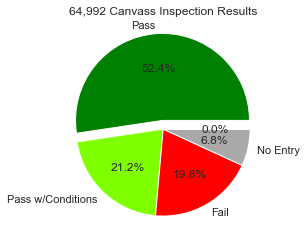

In [52]:
#Kynan visualize Inspection results for Canvass Inspections
colors_can = ["green", "Chartreuse", "red", "darkgrey", "white"]
explode = (0.1,0,0,0,0)
plt.pie(canvass_consequence.value_counts(), labels = can_consequences, autopct="%1.1f%%", colors = colors_can, explode = explode)
plt.title("64,992 Canvass Inspection Results")
plt.savefig("Canvass Inspection Results")


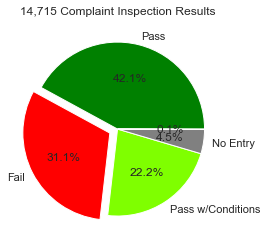

In [53]:
#Kynan visualize inspection results for 
colors_com = ["green", "red","Chartreuse", "grey", "black"]
explode = (0,0.1,0,0,0)
plt.pie(complaint_consequence.value_counts(), labels = com_consequences, autopct="%1.1f%%", colors = colors_com, explode = explode)
plt.title("14,715 Complaint Inspection Results")
plt.savefig("Complaint Inspection Results")

In [54]:
#Kynan look at complaint and canvas inspections by zip code
complaint_zip_count = complaint_data["Zip"].value_counts()
canvass_zip_count = canvass_data["Zip"].value_counts()
complaint_zip_count = complaint_zip_count.sort_index()
canvass_zip_count = canvass_zip_count.sort_index()

In [55]:
# Kynan create variables for total canvass inspections and total complaint inspections
canvass_sum = canvass_zip_count.sum()
complaint_sum = complaint_zip_count.sum()


In [56]:
#Kynan calculate relative distribution of canvas and complaint based inspections per zip code
complaint_percent = []
canvass_percent = []
for complaint in complaint_zip_count:
    complaint_percent.append((complaint/complaint_sum)*100)

for canvass in canvass_zip_count:
    canvass_percent.append(canvass/canvass_sum*100)

# add null value to complaint percent
complaint_percent.append(0)
# format to percent 
#complaint_percent = ['{:.2f}%'.format(elem) for elem in complaint_percent]
#canvass_percent =  ['{:.2f}%'.format(elem) for elem in canvass_percent]
#canvass_percent = canvass_percent.astype(float)
#round complaint zip count
#complaint_zip_count = ['{:f}'.format(elem) for elem in complaint_zip_count]

In [57]:
#Kynan combine complaint and canvass data into new df add zip code as int
relative_inspection_types = pd.DataFrame({"Canvass Raw": canvass_zip_count, "Complaint Raw": complaint_zip_count, 
                                          "Canvass Percent": canvass_percent,
                                          "Complaint Percent": complaint_percent})
zips = relative_inspection_types.index
zips.astype(int)

relative_inspection_types["Zip"] = zips

In [58]:
# Kynan calculate which zip codes get a disproportional share of complaint based inspections by calculating an expected number of complaints
relative_inspection_types["Expected Complaints"] = round(relative_inspection_types["Canvass Percent"]/100 * complaint_sum)
relative_inspection_types["Complaint Index"] = relative_inspection_types["Complaint Raw"]/relative_inspection_types["Expected Complaints"]*100

In [59]:
#Kynan add the differnece to df
relative_inspection_types = relative_inspection_types.sort_values(["Complaint Index"])


In [60]:
#Kynan calculate  chi square critical value 
import scipy.stats as stats
chi_square = pd.DataFrame([relative_inspection_types["Complaint Raw"], relative_inspection_types["Expected Complaints"]]).T
chi_square = chi_square.drop([60827.0], axis = 0)
critical_value = stats.chi2.ppf(q = 0.95, df = 57)
critical_value


75.62374846937608

In [61]:
#Kynan calcualte chi square value
stats.chisquare(chi_square['Complaint Raw'], chi_square['Expected Complaints'])

Power_divergenceResult(statistic=4556.242367484178, pvalue=0.0)

In [62]:
print("Since the chi square value of 3615 is larger than the critical value of 75, we conclude the results are statistically significant")

Since the chi square value of 3615 is larger than the critical value of 75, we conclude the results are statistically significant


In [63]:
#Kynan isolate and visualize the zips that have the most relative complaints
too_many_complaints = relative_inspection_types.iloc[54:59, :]
#x_axis = (["Kenwood","Roseland","South Shore", "Auburn Gresham", "Chatham"])
#plt.bar(x_axis, too_many_complaints["Complaint Index"])

In [64]:
# Kynan add income and lat/long data
demo_path = "Demographics.csv"
demo_request = pd.read_csv(demo_path)
inspection_demo = pd.merge(relative_inspection_types, demo_request, on = "Zip")

In [65]:
#kynan convert income to float

inspection_demo.dtypes

Canvass Raw              int64
Complaint Raw          float64
Canvass Percent        float64
Complaint Percent      float64
Zip                    float64
Expected Complaints    float64
Complaint Index        float64
Location                object
Population             float64
Income                 float64
dtype: object

In [66]:
#Kynan review merged file.
inspection_demo.head()

,Canvass Raw,Complaint Raw,Canvass Percent,Complaint Percent,Zip,Expected Complaints,Complaint Index,Location,Population,Income
0,597,68.0,0.918659,0.462145,60646.0,135.0,50.370370,"41.992931, -87.760278",27016.0,58232.0
1,542,62.0,0.834026,0.421367,60631.0,123.0,50.406504,"41.994948, -87.813225",28832.0,55316.0
2,1768,202.0,2.720586,1.372842,60606.0,400.0,50.500000,"41.881988, -87.637329",NaN,100377.0
3,1536,205.0,2.363586,1.393231,60634.0,348.0,58.908046,"41.946189, -87.806117",74164.0,50042.0
4,296,42.0,0.455483,0.285442,60655.0,67.0,62.686567,"41.694722, -87.703687",29138.0,59849.0


In [67]:
#Kynan look at quartiles by income
inspection_demo["Income"].describe()

count        54.000000
mean      41787.481481
std       15768.665417
min       14205.000000
25%       31267.000000
50%       40124.000000
75%       50981.000000
max      100377.000000
Name: Income, dtype: float64

In [68]:
#Kynan create quartile bins based on income

bin_labels = ["$14K - $31K", "$31K - $40K", "$40K - $51K", "$51K - $100K"]
inspection_demo["Quartile"] = pd.qcut(inspection_demo["Income"], q=[0, .25, .5, .75, 1], labels = bin_labels)
#Kynan take a peek at data 
inspection_demo.head(3)
                  

,Canvass Raw,Complaint Raw,Canvass Percent,Complaint Percent,Zip,Expected Complaints,Complaint Index,Location,Population,Income,Quartile
0,597,68.0,0.918659,0.462145,60646.0,135.0,50.370370,"41.992931, -87.760278",27016.0,58232.0,$51K - $100K
1,542,62.0,0.834026,0.421367,60631.0,123.0,50.406504,"41.994948, -87.813225",28832.0,55316.0,$51K - $100K
2,1768,202.0,2.720586,1.372842,60606.0,400.0,50.500000,"41.881988, -87.637329",NaN,100377.0,$51K - $100K


In [69]:
#Kynan create variables to build a visualization based on bins
x_axis = np.arange(len(bin_labels))
y_ax = inspection_demo.groupby(inspection_demo["Quartile"])
y_axis = round(y_ax["Complaint Raw"].sum()/y_ax["Expected Complaints"].sum()*100)


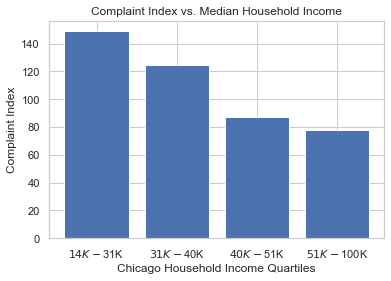

In [70]:
#Kynan create bin bar chart
plt.bar(x_axis, y_axis)
tick_locations = [0, 1, 2, 3]
plt.xticks(tick_locations, bin_labels)
plt.title("Complaint Index vs. Median Household Income")
plt.xlabel("Chicago Household Income Quartiles")
plt.ylabel("Complaint Index")
plt.show
plt.savefig("Income Quartiles vs. Complaint Index.png")

The correlation between both factors is -0.53


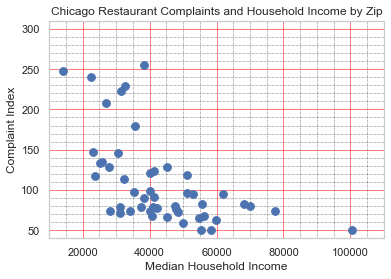

In [71]:
#Kynan Calculate and Visulize the correlation between restaurant complaint index and median household income per zip
income = inspection_demo["Income"]
complaints = inspection_demo["Complaint Index"]
correlation = st.pearsonr(income, complaints)
fig, ax = plt.subplots()
ax.set_axisbelow(True)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(income, complaints, marker = "o", s = 60)
plt.ylim(40, 310)
plt.xlim(10000, 110000)
plt.ylabel("Complaint Index")
plt.xlabel("Median Household Income")
ax.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Chicago Restaurant Complaints and Household Income by Zip")
plt.savefig("Income vs. Complaints.png")

In [72]:
# kynan prepate to look at variance for each quartile using standard deviation and box wisker plots

q1= inspection_demo.loc[inspection_demo["Quartile"]== "$14K - $31K", "Complaint Index"]
q2= inspection_demo.loc[inspection_demo["Quartile"]== "$31K - $40K", "Complaint Index"]
q3 = inspection_demo.loc[inspection_demo["Quartile"]== "$40K - $51K", "Complaint Index"]
q4=  inspection_demo.loc[inspection_demo["Quartile"]== "$51K - $100K", "Complaint Index"]
quarts = [q1, q2, q3, q4]


the $14K -$31K standard deviation is 95
the $31K - $40K standard deviation is 104
the $40K - $51K standard deviation is 23
the $51K - $100K standard deviation is 20


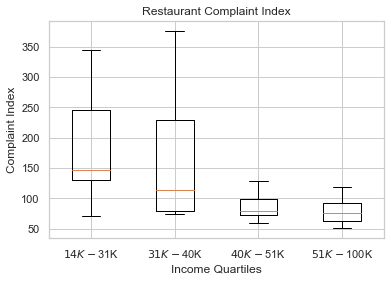

In [73]:
# kynan look at variance for each quartile using standard deviation and box wisker plots
fig1, ax1 = plt.subplots()
ax1.set_title(f'Restaurant Complaint Index')
ax1.set_ylabel('Complaint Index')
ax1.set_xlabel("Income Quartiles")
ax1.set_xticklabels(bin_labels)
ax1.boxplot(quarts)
print(f'the $14K -$31K standard deviation is {round(q1.std())}')
print(f'the $31K - $40K standard deviation is {round(q2.std())}')
print(f'the $40K - $51K standard deviation is {round(q3.std())}')
print(f'the $51K - $100K standard deviation is {round(q4.std())}')
plt.show()
fig1.savefig("Income Quartiles and Complaint Index Variance.png")

In [74]:
#Kynan prep df for gmap visulaiztion by splitting Location columns and converting data to float
inspection_demo[["Lat","Lng"]] = inspection_demo.Location.str.split(",", expand = True,)
gmap_location= inspection_demo[["Lat", "Lng"]].astype(float)


In [75]:
#create map to visualize complaint index by zip
import gmaps
import os
from api_key import g_key

locations = gmap_location
weights = inspection_demo["Complaint Index"]
center = (41.88, -87.63)
markers = locations
gmaps.configure(api_key = g_key)

fig = gmaps.figure(center = center, zoom_level = 10)
fig.add_layer(gmaps.heatmap_layer(locations, weights = weights, dissipating=False, max_intensity=275, point_radius = .03))
fig

Figure(layout=FigureLayout(height='420px'))

In [76]:
#isolate zip codes from the lowest two income quartiles 
fourth = inspection_demo[~inspection_demo["Quartile"].isin(["$51K - $100K", "$40K - $51K"])]
fourth_location = fourth[["Lat", "Lng"]].astype(float)
decimals = 2    

fourth = fourth.round({"Complaint Index": 0})


In [77]:
info_box_template = """
<dl>
<dt>Zip</dt><dd>{Zip}</dd>
<dt>ci</dt><dd>{Complaint Index}</dd>
</dl>
"""
locations = fourth_location
weights = fourth["Complaint Index"]
center = (41.88, -87.63)
zip_info = [info_box_template.format(**row) for index, row in fourth.iterrows()]
marker_layer = gmaps.marker_layer(fourth_location, info_box_content = zip_info)

gmaps.configure(api_key = g_key)

fig = gmaps.figure(center = center, zoom_level = 11)
fig.add_layer(gmaps.heatmap_layer(locations, weights = weights, dissipating=False, max_intensity=275, point_radius = .03))
fig.add_layer(marker_layer)
fig


Figure(layout=FigureLayout(height='420px'))